In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# df = pd.read_csv('dayenam.csv')
sns.set(style="white")

# pd.read_csv('dayenam.csv', header=None).T.to_csv('dayenam-out.csv', header=False, index=False)

In [126]:
df = pd.read_csv('filtered_author_data1.csv')
df

,author_name,timestamp,sha,message_len,full_message_len,type,sentiment,message,project,forks
0,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1362553997,a084957faf242f9f0f8c3a8c77b0a509e932d3da,18,18,na,0.000000,Update Syllabus md,phodiep_PythonCertSpring,7
1,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1362554668,325b740b1c7224c6d2a0105dc3b353954c6b8e51,18,18,na,0.000000,Update Syllabus md,phodiep_PythonCertSpring,7
2,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1363060901,71e27df2c46f450085ad5918b5e09d38ec84286f,18,18,na,0.000000,Update Syllabus md,phodiep_PythonCertSpring,7
3,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1363134381,17582520967b741035241925421b4eeb954553d2,16,16,na,0.000000,Update README md,phodiep_PythonCertSpring,7
4,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1363135067,8e24f298885b226f711953798db1d1a3471295d1,18,18,na,0.000000,Update Syllabus md,phodiep_PythonCertSpring,7
5,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1367296982,65aef16626338a38bc4caa0fbe0f0d7d08c71144,18,18,na,0.000000,Update Syllabus md,phodiep_PythonCertSpring,5
6,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1367367210,944e86e7d1acb4888bb64a32f3b6a97ae860b4cb,18,18,na,0.000000,Update Syllabus md,phodiep_PythonCertSpring,5
7,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1368988899,4db9f0660e7dff447625329d6d1471631bde45d6,14,15,na,0.000000,Initial commit,maecky_wxPythonDemos,4
8,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1372427999,fd31a3db6b8f2fa7cc172cbfbb462f5d6da99030,16,16,na,0.000000,Create readme md,mjmv_scipy2013_talks,48
9,"Christopher H.Barker, PhD <PythonCHB@gmail.com>",1372448639,06055b6b3ab0f7cc9c8d08a0fcae8bc26b9945fb,92,93,na,0.000000,Merge bd8d86a7eeadb2a8888d0ad788dd6771adb6d4a6...,mjmv_scipy2013_talks,2


In [87]:
from datetime import datetime

df['month'] = df.apply(lambda row: int(datetime.utcfromtimestamp(int(row.timestamp)).strftime('%m')), axis=1)
df['year'] = df.apply(lambda row: int(datetime.utcfromtimestamp(int(row.timestamp)).strftime('%Y')), axis=1)

firstyear = min(df['year'])
df['month_relative'] = df.apply(lambda row: (((row.year%firstyear))*12)+row.month, axis=1)

In [127]:
# df

In [123]:
df_mmyy_grouped = df.groupby(["author_name", "month_relative"]).forks.sum().reset_index().sort_values(["month_relative"], ascending=[True])
df_sentiment_grouped = df.groupby(["author_name", "month_relative"]).sentiment.mean().reset_index().sort_values(["month_relative"], ascending=[True])
df_messagelen_grouped = df.groupby(["author_name", "month_relative"]).full_message_len.mean().reset_index().sort_values(["month_relative"], ascending=[True])

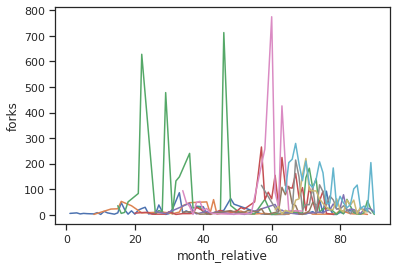

In [108]:
df_temp = df_mmyy_grouped[df_mmyy_grouped.author_name != 'Lad, Prabhakar <prabhakar.csengg@gmail.com>']

q_forks = df_mmyy_grouped["forks"].quantile(0.95)

g = sns.lineplot(x="month_relative", y="forks", hue='author_name',
             data=df_mmyy_grouped[df_mmyy_grouped["forks"] < q_forks])
g.legend_.remove()

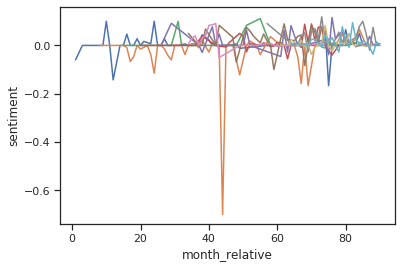

In [114]:
q_sentiment = df_sentiment_grouped["sentiment"].quantile(0.99)

g = sns.lineplot(x="month_relative", y="sentiment", hue='author_name',
             data=df_sentiment_grouped[df_sentiment_grouped["sentiment"] < q_sentiment])

g.legend_.remove()

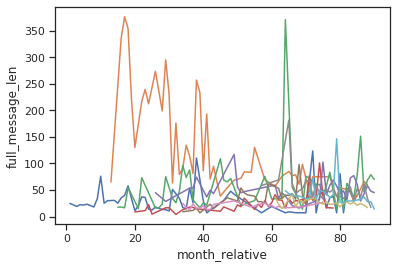

In [122]:
q_message = df_messagelen_grouped["full_message_len"].quantile(0.99)

g = sns.lineplot(x="month_relative", y="full_message_len", hue='author_name',
             data=df_messagelen_grouped[df_messagelen_grouped["full_message_len"] < q_message])

g.legend_.remove()

In [152]:
df_gender = pd.read_csv('listofuser_with_genderinference_final.csv')
df_sentiment_gender = pd.merge(df_sentiment_grouped, df_gender, on='author_name')
df_sentiment_gender

,author_name,month_relative,sentiment,inferred_gender,login,total_follower,Unnamed: 4,manually inferred gender,other notes
0,"Kenta, Kobayashi <kentafly88@gmail.com>",1,-0.060000,man,kfly8,36,NaN,NaN,NaN
1,"Kenta, Kobayashi <kentafly88@gmail.com>",3,0.000000,man,kfly8,36,NaN,NaN,NaN
2,"Kenta, Kobayashi <kentafly88@gmail.com>",4,0.000000,man,kfly8,36,NaN,NaN,NaN
3,"Kenta, Kobayashi <kentafly88@gmail.com>",5,0.000000,man,kfly8,36,NaN,NaN,NaN
4,"Kenta, Kobayashi <kentafly88@gmail.com>",6,0.000000,man,kfly8,36,NaN,NaN,NaN
5,"Kenta, Kobayashi <kentafly88@gmail.com>",8,0.000000,man,kfly8,36,NaN,NaN,NaN
6,"Kenta, Kobayashi <kentafly88@gmail.com>",9,0.000000,man,kfly8,36,NaN,NaN,NaN
7,"Kenta, Kobayashi <kentafly88@gmail.com>",10,0.100000,man,kfly8,36,NaN,NaN,NaN
8,"Kenta, Kobayashi <kentafly88@gmail.com>",11,0.000000,man,kfly8,36,NaN,NaN,NaN
9,"Kenta, Kobayashi <kentafly88@gmail.com>",12,-0.142857,man,kfly8,36,NaN,NaN,NaN


In [153]:
import matplotlib.pyplot as plt

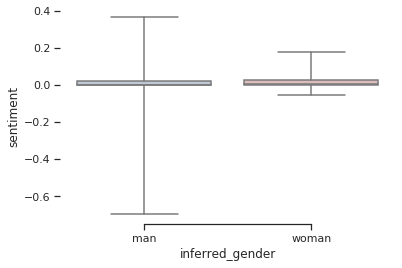

In [154]:
sns.set(style="ticks")

sns.boxplot(x="inferred_gender", y="sentiment", data=df_sentiment_gender,
            whis="range", palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

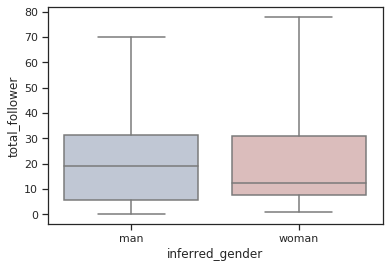

In [156]:
sns.boxplot(x="inferred_gender", y="total_follower", data=df_gender,
            whis="range", palette="vlag")